# Explore auction results

EDA of recent auction.

In [1]:
import drz_config
cfg = drz_config.read_config()
DATE = cfg['DATE']
VERBOSE = cfg['VERBOSE']
OPBOD = cfg['OPBOD']

if VERBOSE > 0:
    display(cfg)

{'settings_fn': '../code/assets/drz-auction-settings.ini',
 'DATE': '2021-05',
 'VERBOSE': 1,
 'OPBOD': False,
 'URL': 'http://verkoop.domeinenrz.nl/verkoop_bij_inschrijving_2021-0005',
 'EXTEND_URL': False,
 'CLOSEDDATA': True,
 'closed_data_fields': '*',
 'SKIPSAVE': False}

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

# Load results

Load both auction results **and** data from rdw.

In [3]:
if OPBOD:
    file_name = '../../../python-nb/data/drz-data-opbod-{}.pkl'.format(DATE)
else:
    file_name = '../data/drz-data-{}.pkl'.format(DATE)
print(file_name)
drz = pd.read_pickle(file_name)

if OPBOD:
    file_name = '../../../python-nb/data/rdw-data-opbod-{}.pkl'.format(DATE)
else:
    file_name = '../data/rdw-data-{}.pkl'.format(DATE)
print(file_name)
rdw = pd.read_pickle(file_name)

# rdw column names
#   NOTE: format changed in April 2019: RDW info is appended to auction results as extra columns in dataframe
if pd.to_datetime(DATE, format='%Y-%m') >= pd.to_datetime('2019-04', format='%Y-%m'):
    rdwinfo = [c for c in rdw.columns if c.startswith('rdw_')]

# fix odometer
if pd.to_datetime(DATE, format='%Y-%m') == pd.to_datetime('2019-09', format='%Y-%m'):
    sel = (rdw.OdoKM == 'volgens NAP logisch') | (rdw.OdoKM == 'volgens NAP onlogisch') | (rdw.OdoKM == 'volgens nap onlogisch')
    display(drz.loc[sel, ['Title', 'OdoKM', 'NAP']])
    
    idx = '2019-9-9106'
    print('\n'.join(drz.loc[idx,'Raw_text']))
    drz.loc[idx,'NAP'] = 'logisch'
    rdw.loc[idx,'NAP'] = 'logisch'
    drz.loc[idx,'OdoKM'] = '251.571'
    rdw.loc[idx,'OdoKM'] = '251.571'
    
    display(drz.loc[[idx],['Title', 'OdoKM', 'NAP']])
    display(rdw.loc[[idx],['Title', 'OdoKM', 'NAP']])

    idx = '2019-9-9258'
    print('\n'.join(drz.loc[idx,'Raw_text']))
    drz.loc[idx,'NAP'] = 'onlogisch'
    rdw.loc[idx,'NAP'] = 'onlogisch'
    drz.loc[idx,'OdoKM'] = ''
    rdw.loc[idx,'OdoKM'] = ''
    
    idx = '2019-9-9249'
    print('\n'.join(drz.loc[idx,'Raw_text']))
    drz.loc[idx,'NAP'] = 'onlogisch'
    rdw.loc[idx,'NAP'] = 'onlogisch'
    drz.loc[idx,'OdoKM'] = ''
    rdw.loc[idx,'OdoKM'] = ''
    
    
    display(rdw.loc[sel, ['Title', 'OdoKM', 'NAP']])
    display(drz.loc[sel, ['Title', 'OdoKM', 'NAP']])
    sel = (rdw.OdoKM == 'volgens NAP logisch') | (rdw.OdoKM == 'volgens NAP onlogisch')
    assert all(~sel)



../data/drz-data-2021-05.pkl
../data/rdw-data-2021-05.pkl


# Cheap cars with valid inspection

In [4]:
is_cheap = (
    drz.LotType == "Personenauto"
) & (
    drz.Price<3000
) & (
    drz.Price>0
) & ~(
    (
        drz.APKdate.isnull()
    ) | (
        drz.APKdate.apply(lambda x:x == '')
    )
)

drz.loc[is_cheap,
        ["Price","ItemType","ItemBrand","Mfdate","APKdate","OdoKM","automatic", "benzine"]].sort_values(by=['benzine', 'automatic', 'OdoKM'], ascending=False)

,Price,ItemType,ItemBrand,Mfdate,APKdate,OdoKM,automatic,benzine
2021-05-8080,2222.0,toyota aygo,TOYOTA,13.10.2010,02.07.2021,onbekend,True,True
2021-05-8087,1112.0,audi a4; avant 140 kw aut,AUDI,28.05.2004,22.09.2021,348.622,True,True
2021-05-8133,374.0,307; sw 1.6 16v aut.,PEUGEOT,31.03.2003,26.06.2021,293.546,True,True
2021-05-8044,1096.0,vectra; c-cc gts z28nel,OPEL,25.10.2005,21.11.2021,250.707,True,True
2021-05-8020,1704.0,golf; fsi 85 kw aut,VOLKSWAGEN,09.02.2005,20.08.2021,224.035,True,True
2021-05-8051,689.0,signum; z2.2yh,OPEL,02.10.2003,02.11.2021,189.978,True,True
2021-05-8043,1007.0,corsa-c; z1.4xe automatic,OPEL,17.01.2002,17.01.2022,121.808,True,True
2021-05-8067,1005.0,c4,CITROËN,25.06.2008,19.05.2021,275.152,False,True
2021-05-8000,703.0,vectra-c-cc; gts z2.2se,OPEL,18.07.2003,01.03.2022,265.166,False,True
2021-05-8048,2111.0,mini cooper,MINI,22.10.2003,24.06.2021,236.952,False,True


In [5]:
is_reserved = (
    drz.LotType == "Personenauto"
) & (
    drz.Price == 0
) 

drz.loc[is_reserved,
        ["Price","ItemType","ItemBrand","Mfdate","APKdate","OdoKM","automatic"]].sort_values(by=['APKdate', 'automatic', 'OdoKM'], ascending=False)

,Price,ItemType,ItemBrand,Mfdate,APKdate,OdoKM,automatic
2021-05-8077,0.0,c 450 amg,MERCEDES-BENZ,30.06.2017,30.06.2021,54.831,True
2021-05-8139,0.0,polo,VOLKSWAGEN,20.06.2006,27.10.2021,288.817,False
2021-05-8029,0.0,fiat punto,FIAT,27.10.2010,27.10.2021,251.731,False
2021-05-8148,0.0,megane,RENAULT,04.10.2006,22.12.2021,158.213,False
2021-05-8097,0.0,530d,BMW,18.11.2010,22.07.2021,239.747,True
2021-05-2204,0.0,s8 plus,AUDI,03.11.2017,03.11.2021,79.131,True
2021-05-8137,0.0,530d,BMW,21.01.2007,,344.753,True
2021-05-8025,0.0,cayenne s,PORSCHE,27.02.2004,,184.976,True
2021-05-8157,0.0,i30,HYUNDAI,02.10.2014,,18.048,True
2021-05-8146,0.0,jaguar xf sportbrake,JAGUAR,25.11.2014,,163.005,True


In [6]:
if pd.to_datetime(DATE, format='%Y-%m') < pd.to_datetime('2019-04', format='%Y-%m'):
    display(rdw.loc[is_cheap,["rdwinfo"]])
else:
    display(rdw.loc[is_cheap,rdwinfo])

,rdw_kenteken,rdw_Reg,rdw_LotType,rdw_voertuigsoort,rdw_merk,rdw_handelsbenaming,rdw_datum_tenaamstelling,rdw_bruto_bpm,rdw_inrichting,rdw_aantal_zitplaatsen,...,rdw_ovi_aantal_staanplaatsen,rdw_ovi_afwijkende_max_snelheid,rdw_ovi_laadvermogen,rdw_ovi_lengte,rdw_ovi_sub_cat_omschrijving,rdw_ovi_afstand_hartkoppeling_tot_achterzijde_vrtg,rdw_ovi_private_owners,rdw_ovi_company_owner,rdw_ovi_owners,rdw_ovi_under_survey
2021-05-8000,88NBRZ,88-NB-RZ,Personenauto,Personenauto,OPEL,VECTRA-C-CC,20210331.0,6513.0,hatchback,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,10.0,0.0,10.0,False
2021-05-8002,75NHTH,75-NH-TH,Personenauto,Personenauto,OPEL,CORSA-C,20210331.0,1811.0,hatchback,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.0,3.0,False
2021-05-8005,16TLRH,16-TL-RH,Personenauto,Personenauto,MAZDA,MAZDA 6,20210331.0,6120.0,sedan,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.0,3.0,False
2021-05-8015,04RZJB,04-RZ-JB,Personenauto,Personenauto,KIA,RIO,20210408.0,2295.0,MPV,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,0.0,4.0,False
2021-05-8017,5SJS86,5-SJS-86,Personenauto,Personenauto,VOLKSWAGEN,UP,20210316.0,NaN,hatchback,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,9.0,0.0,9.0,False
2021-05-8020,43RDKK,43-RD-KK,Personenauto,Personenauto,VOLKSWAGEN,GOLF,20210106.0,6189.0,hatchback,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,6.0,0.0,6.0,False
2021-05-8026,K463KJ,K-463-KJ,Personenauto,Personenauto,TOYOTA,TOYOTA AYGO,20210401.0,NaN,hatchback,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.0,False
2021-05-8027,PH089P,PH-089-P,Personenauto,Personenauto,VOLKSWAGEN,POLO,20210401.0,6326.0,hatchback,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,6.0,0.0,6.0,False
2021-05-8037,J582LX,J-582-LX,Personenauto,Personenauto,TOYOTA,TOYOTA YARIS,20210402.0,1783.0,hatchback,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,False
2021-05-8043,17HZFD,17-HZ-FD,Personenauto,Personenauto,OPEL,CORSA-C,20210414.0,3557.0,hatchback,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,8.0,0.0,8.0,False


In [7]:
if pd.to_datetime(DATE, format='%Y-%m') < pd.to_datetime('2019-04', format='%Y-%m'):
    display(rdw.loc[is_cheap,"rdwinfo"][0])
else:
    display(rdw.loc[is_cheap,rdwinfo].iloc[0,:])

rdw_kenteken                                                88NBRZ
rdw_Reg                                                   88-NB-RZ
rdw_LotType                                           Personenauto
rdw_voertuigsoort                                     Personenauto
rdw_merk                                                      OPEL
                                                          ...     
rdw_ovi_afstand_hartkoppeling_tot_achterzijde_vrtg             NaN
rdw_ovi_private_owners                                        10.0
rdw_ovi_company_owner                                          0.0
rdw_ovi_owners                                                10.0
rdw_ovi_under_survey                                         False
Name: 2021-05-8000, Length: 641, dtype: object

# Pictures of lots

In [8]:
# ix=drz.N_images.idxmax()
ix=drz.Price.idxmax(); print('Price: EUR {:g}\n\n'.format(drz.loc[ix,'Price']))
# Mfdate = drz.Mfdate.apply(lambda x: pd.to_datetime(x,format='%d.%m.%Y') if len(x)==10 else np.NaN)
# ix=Mfdate.idxmin(); print('year of mf: {:s}\n\n'.format(drz.loc[ix,'Mfdate']))
# ix = '2019-2-2005' # largest km/day
# ix = '2019-2-7345' # largest km

print(ix)
for u in drz.loc[ix,'Images']:
    print(u)
    print(drz.loc[ix,'Source'])
    display(Image(url=u,width=400))
    

Price: EUR 105000


2021-05-8126
http://verkoop.domeinenrz.nl/ufc/static/1619433735/thumb/domeinenrz_sites/ee16ce14c3e97d7743885721c2bf7238/1024/768/image.jpg
http://verkoop.domeinenrz.nl/verkoop_bij_inschrijving_2021-0005?=&meerfotos=K2100058126


http://verkoop.domeinenrz.nl/ufc/static/1619433728/thumb/domeinenrz_sites/666b83c622971587fd45ef643e046bcc/1024/768/image.jpg
http://verkoop.domeinenrz.nl/verkoop_bij_inschrijving_2021-0005?=&meerfotos=K2100058126


http://verkoop.domeinenrz.nl/ufc/static/1619433733/thumb/domeinenrz_sites/c84f6c9c156b3f737e0bc3a7c6368337/1024/768/image.jpg
http://verkoop.domeinenrz.nl/verkoop_bij_inschrijving_2021-0005?=&meerfotos=K2100058126


http://verkoop.domeinenrz.nl/ufc/static/1619433732/thumb/domeinenrz_sites/bdd2c310187e4dc8b8e35e141d44b06a/1024/768/image.jpg
http://verkoop.domeinenrz.nl/verkoop_bij_inschrijving_2021-0005?=&meerfotos=K2100058126


http://verkoop.domeinenrz.nl/ufc/static/1619433726/thumb/domeinenrz_sites/3a2651af6a1a874a4857d063ca8e0474/1024/768/image.jpg
http://verkoop.domeinenrz.nl/verkoop_bij_inschrijving_2021-0005?=&meerfotos=K2100058126


http://verkoop.domeinenrz.nl/ufc/static/1619433729/thumb/domeinenrz_sites/74eab8cb900a51aed6b832013ab66fb3/1024/768/image.jpg
http://verkoop.domeinenrz.nl/verkoop_bij_inschrijving_2021-0005?=&meerfotos=K2100058126


http://verkoop.domeinenrz.nl/ufc/static/1619433734/thumb/domeinenrz_sites/d9ce56f9454742ab6e379188ea44eae5/1024/768/image.jpg
http://verkoop.domeinenrz.nl/verkoop_bij_inschrijving_2021-0005?=&meerfotos=K2100058126


http://verkoop.domeinenrz.nl/ufc/static/1619433729/thumb/domeinenrz_sites/7d2c1a1ac307e9aae1e88e1b7d2d3bad/1024/768/image.jpg
http://verkoop.domeinenrz.nl/verkoop_bij_inschrijving_2021-0005?=&meerfotos=K2100058126


http://verkoop.domeinenrz.nl/ufc/static/1619433734/thumb/domeinenrz_sites/d80ff1c6c8fdb392c66caa4d40270ba7/1024/768/image.jpg
http://verkoop.domeinenrz.nl/verkoop_bij_inschrijving_2021-0005?=&meerfotos=K2100058126


# Usage

How many km are driven per year or day?

### Odometer conversion

In [9]:
def odo_str2float(df):
    '''
    Convert odometer to numerical values.
    Also convert Miles to KMs.
    '''
    
    ml2km = 1.609344
    
    # substitute to nan
    df.OdoKM = df.OdoKM.apply(lambda x:x.replace('onbekend','nan') if (type(x) == str) and (len(x)>0) else 'nan')
    df.OdoMLS = df.OdoMLS.apply(lambda x:x.replace('onbekend','nan') if (type(x) == str) and (len(x)>0) else 'nan')
    # float
    df["OdoKM_num"] = df.OdoKM.apply(lambda x:x.replace('.','')).astype(float)
    df["OdoMLS_num"] = df.OdoMLS.apply(lambda x:x.replace('.','')).astype(float)
    # convert miles to km
    df["Odo"] = df.OdoKM_num.copy()
    chooseMls = (df.OdoKM_num.isna()) & ~(df.OdoMLS_num.isna())
    df.loc[chooseMls,"Odo"] = df.loc[chooseMls,"OdoMLS_num"].apply(float) * ml2km

In [10]:
odo_str2float(drz)

drz[['Odo','OdoKM','OdoKM_num','OdoMLS','OdoMLS_num']]

,Odo,OdoKM,OdoKM_num,OdoMLS,OdoMLS_num
2021-05-1800,21473.0,21.473,21473.0,nan,NaN
2021-05-1801,19192.0,19.192,19192.0,nan,NaN
2021-05-1802,NaN,nan,NaN,nan,NaN
2021-05-1803,6899.0,6.899,6899.0,nan,NaN
2021-05-1804,18077.0,18.077,18077.0,nan,NaN
...,...,...,...,...,...
2021-05-8158,294686.0,294.686,294686.0,nan,NaN
2021-05-8159,NaN,nan,NaN,nan,NaN
2021-05-8160,NaN,nan,NaN,nan,NaN
2021-05-8161,NaN,nan,NaN,nan,NaN


### Dates

In [11]:
drz.Mfdate.value_counts()

              15
24.02.2009     2
31.08.2005     2
30.08.2013     2
20.06.2018     1
              ..
19.08.2016     1
28.02.2016     1
25.04.2017     1
31.03.2003     1
13.10.2010     1
Name: Mfdate, Length: 202, dtype: int64

In [12]:
AuctDate = pd.to_datetime(drz.index[0][0:-5], format = '%Y-%m')

# serial date
drz["Mfdate_ser"] = drz.Mfdate.apply(lambda x:pd.to_datetime(x, format = '%d.%m.%Y') if (x!='onbekend') & (x!='') & ('-' not in x) & (len(x) >= 8)else np.NaN)

# age
drz["Age"] = (AuctDate - drz.Mfdate_ser)
drz["Age_year"] = drz.Age.apply(lambda x:x.days/365.25)

- - - -
# Continue with cars only

In [13]:
out = drz.Price.copy()
Features = drz.loc[:,["ItemBrand","ItemType","Odo","Age_year"]].copy()

In [14]:
# Drop rows
Subsel = drz.LotType == 'Personenauto'
dropIx=drz[~Subsel].index
out.drop(index=dropIx,inplace=True)
Features.drop(index=dropIx,inplace=True)

### one hot encoding brand and model

In [15]:
Dummies = pd.get_dummies(Features.ItemBrand,prefix='Brand_',drop_first=False)
Features = pd.concat([Features,Dummies],axis=1)

Features.describe()

,Odo,Age_year,Brand__AUDI,Brand__AUDI/PORSCHE,Brand__BMW,Brand__CHEVROLET,Brand__CITROËN,Brand__DACIA,Brand__DAIHATSU,Brand__FIAT,...,Brand__PEUGEOT,Brand__PORSCHE,Brand__RENAULT,Brand__ROLLS ROYCE,Brand__SEAT,Brand__SKODA,Brand__TOYOTA,Brand__VOLKSWAGEN,Brand__VOLKWAGEN,Brand__VOLVO
count,120.000000,123.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,...,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,176138.978842,11.333189,0.071429,0.007937,0.063492,0.007937,0.023810,0.007937,0.015873,0.015873,...,0.031746,0.031746,0.023810,0.007937,0.047619,0.007937,0.031746,0.214286,0.007937,0.007937
std,90063.245811,7.148179,0.258567,0.089087,0.244819,0.089087,0.153064,0.089087,0.125483,0.125483,...,0.176023,0.176023,0.153064,0.089087,0.213809,0.089087,0.176023,0.411964,0.089087,0.089087
min,4113.000000,1.289528,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,107162.250000,6.417522,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,178731.000000,10.409309,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,237650.750000,15.340178,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,392199.000000,55.991786,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Plotting

In [16]:
def ecdf(data):
    x = sorted(data)
    y = np.arange(0,len(x))/len(x)
    return x,y

# # example
# x,y = ecdf(km_p_day)
# plt.plot(x,y)

In [17]:
# km per day
km_p_day = Features.Odo/(Features.Age_year*365.25).fillna(0)
sel = ~(km_p_day.isna() | (km_p_day == np.inf))
km_p_day = km_p_day.loc[sel]

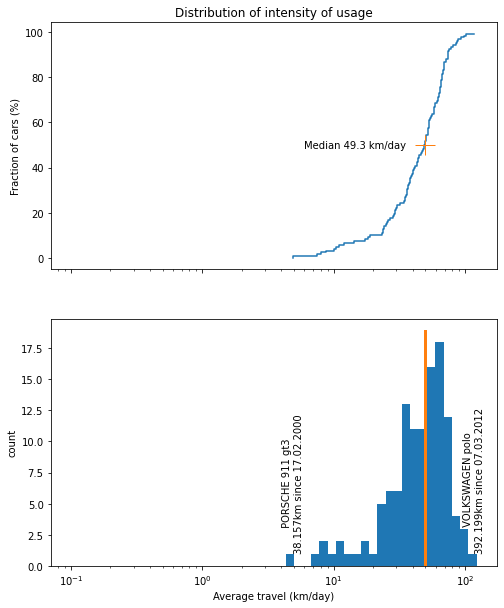

In [18]:
# Plot ecdf and hist
x,y = ecdf(km_p_day)
fig,axs = plt.subplots(ncols=1,nrows=2, figsize=[8,10],sharex=True)

# ecdf
ax = axs[0]
ax.step(x,y*100)
ax.plot(np.median(x),50,'+',markersize=20)
ax.text(np.median(x),50,'Median {:.1f} km/day      '.format(np.median(x)),ha='right',va='center');
ax.set_title('Distribution of intensity of usage')
ax.set_ylabel('Fraction of cars (%)')

xl = axs[0].get_xlim()

# hist
ax = axs[1]
ax.hist(x,bins=np.logspace(-1,np.log10(xl[1]),50))
yl = axs[1].get_ylim()
ax.plot(np.array([1,1])*np.median(x),yl,'-',linewidth=3)
ax.set_xlabel('Average travel (km/day)')
ax.set_ylabel('count')

ax.text(
    km_p_day.min(),1,
    ' {} {}\n{}km since {}'.format(*rdw.loc[km_p_day.idxmin(),['ItemBrand','ItemType','OdoKM','Mfdate']].values),
    rotation=90,
    va='bottom',
    ha='center'
)

ax.text(
    km_p_day.max(),1,
    ' {} {}\n{}km since {}'.format(*rdw.loc[km_p_day.idxmax(),['ItemBrand','ItemType','OdoKM','Mfdate']].values),
    rotation=90,
    va='bottom',
    ha='center'
)

ax.set_xscale('log')


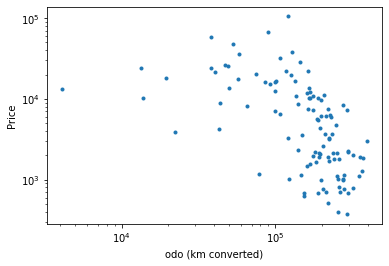

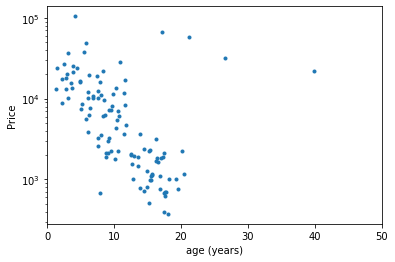

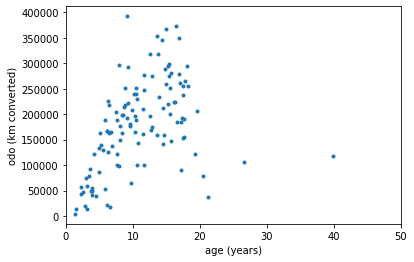

In [19]:
plt.plot(Features.Odo,out,'.')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('odo (km converted)')
plt.ylabel('Price')

plt.figure()
plt.plot(Features.Age_year,out,'.')
plt.yscale('log')
plt.xlabel('age (years)')
plt.ylabel('Price')
plt.xlim(0,50)


plt.figure()
plt.plot(Features.Age_year,Features.Odo,'.')
plt.xlabel('age (years)')
plt.ylabel('odo (km converted)')
plt.xlim(0,50)

plt.show()



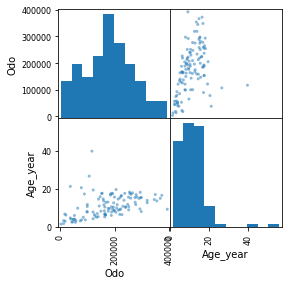

In [20]:
pd.plotting.scatter_matrix(Features.loc[:, [c for c in Features.columns if not c.startswith('Brand__')]],figsize=[4,4])
plt.show()

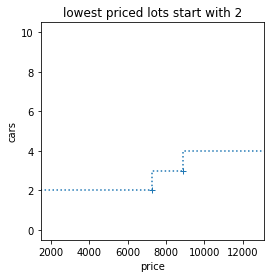

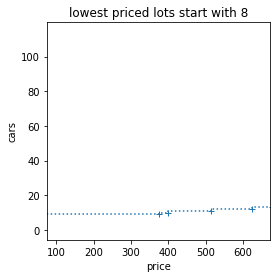

In [21]:
# reserved price?
gr = [l[:1] for l in np.array([*out.index.str.split('-')])[:,2]]
gb = out.groupby(gr)
for g,_ in gb:
    x,y = ecdf(gb.get_group(g))
    plt.figure(figsize=[4,4])
    plt.step(x,y*len(y),'+:')
    plt.xlim(left=np.unique(x)[1]*0.2, right=np.unique(x)[1]*1.8)
    plt.xlabel('price')
    plt.ylabel('cars')
    plt.title(f'lowest priced lots start with {g}')
    # lowest price is 174?
    out.value_counts().sort_index()